In [2]:
costs = [3,4,12,23,43,100]
for cost in costs:
    print('消费{}元'.format(str(cost).center(10)))
    

消费    3     元
消费    4     元
消费    12    元
消费    23    元
消费    43    元
消费   100    元


In [9]:
import random
random_numbers=[]
while len(random_numbers)<20:
    random_numbers.append(random.randint(1,10))
print(random_numbers,len(random_numbers))

[8, 4, 6, 9, 9, 7, 8, 9, 7, 2, 6, 9, 3, 2, 1, 4, 10, 4, 1, 7] 20


In [17]:
random_numbers = []
while 9 not in random_numbers:
    random_numbers.append(random.randint(1,10))
print(random_numbers, len(random_numbers))

[8, 1, 4, 3, 2, 8, 3, 4, 8, 5, 3, 7, 1, 9] 14


In [23]:
a = [1,2,3]
b = 1
c = (b in a)

print('{}'.format(type(c)))

<class 'bool'>


### 如果元组只有1个元素，就必须加一个逗号，防止被当作括号运算

In [28]:
a = (3)
type(a)

int

#### 推导式

In [33]:
random_numbers = list(range(10))
random_numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
numbers = []

#### 列表推导式

In [41]:
new_numbers = [number*10 for number in random_numbers]
new_numbers

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

#### 字典推导式

In [49]:
new_dict = {number:'A' for number in random_numbers}
new_dict

{0: 'A',
 1: 'A',
 2: 'A',
 3: 'A',
 4: 'A',
 5: 'A',
 6: 'A',
 7: 'A',
 8: 'A',
 9: 'A'}

#### 元组推导式

In [50]:
tuple_number = (number for number in random_numbers)
tuple_number

<generator object <genexpr> at 0x000002EE181AD318>

#### 生成器
一下只能生成一次

In [52]:
tuple(tuple_number)

()

In [63]:
variable = {
    'a':100,
    'b':200,
    'c':300
}

In [64]:
variable.items()

dict_items([('a', 100), ('b', 200), ('c', 300)])

In [66]:
[key for key,value in variable.items() if value == 200]

['b']

### 抽象概念

In [1]:
def get_keys(dict_variable,value):
    return [k for k,v in dict_variable.items() if v == value]

In [86]:
get_keys(variable, 300)

['c']

In [2]:
get_keys({'a':40},40)

['a']

### 函数通过参数获取我们传递的值，函数中改变了参数的值，那传递进去的值会改变么？

In [3]:
def test(varibal):
    varibal = 100
    return varibal

In [5]:
var = 1
test(var)

100

In [6]:
print(var)

1


In [10]:
def test(varibal):
    varibal.append(100)
    return varibal

In [11]:
var = []
test(var)

[100]

In [12]:
print(var)

[100]


### 不建议对可变类型在函数内进行更改，建议用函数返回值进行重新赋值

In [22]:
def test(varibal):
    temp = varibal.copy() #or [i for i in varibal]#
    temp.append(100)
    return temp

In [23]:
var = []
test(var)

[100]

In [24]:
print(var)

[]


### 参数的收集

In [47]:
def test(name, age, *args, **kwargs):#位置参数，关键字参数
    print(name, age, *args, **kwargs)#有无星号的区别

In [48]:
test('wang',1,2,23,3)

wang 1 2 23 3


In [49]:
test('wang',1,2,[23,3])

wang 1 2 [23, 3]


In [50]:
dict_varibal = {
    'weight' : 120,
    'height' : 170
}
test('wang',24,dict_varibal)

wang 24 {'weight': 120, 'height': 170}


### 装饰器

In [1]:
a = 10
b = [12,12]

def test():
    print('test')
    
c = test

可以把函数赋值给一个变量

In [4]:
c.__name__


'test'

In [7]:
def test(func):
    return func
def func():
    print('func run')
    
f = test(func)
f.__name__
f()


func run


###    函数可以当作函数的返回值进行返回

In [37]:
import random
# 返回一个从0到1的浮点值
def test():
    return round(random.random(),3)

In [38]:
# 函数返回的浮点值保留三个有效数字

In [39]:
test()

0.137

### python另一个语法糖，装饰器

In [65]:
@decorator # 就是f = decorator(test)
def test():
    return random.random()
@decorator # 就是f = decorator(test)
def test_two():
    return random.random()*10

In [66]:
def decorator(func):
    def wrapper(*args, **kwargs):
        return round(func(*args, **kwargs),3)
    return wrapper

In [52]:
#f = decorator(test) 完全等价于@decorator

In [61]:
f()

0.9945472398728817

In [62]:
f.__name__

'wrapper'

In [63]:
test()

0.099

In [67]:
test_two()

6.178

### 类

In [70]:
class Person():
    
    def __init__(self, name, age):
        self._name = name
        self._age  = age
    
    @property    #后面get_name就不用加括号
    def get_name(self):
        return self._name
    
    def rename(self, new_name):
        self._name = new_name

### 初始化函数中，self后面的是实例化对象的属性，加下划线的意思是，代表这个属性是私有的，不应该访问

In [71]:
s = 'hello world'
s.center(12)

'hello world '

In [72]:
p = Person('wong',12)

In [74]:
p.get_name

'wong'

In [41]:
p.rename('Wong Nan')

In [42]:
p.get_name()

'Wong Nan'

In [45]:
p_2 = Person('Li', 11)
p_2.get_name()

'Li'

In [61]:
class Student(Person):
    
    def set_score(self, score):
        self._score = score
        
    def get_score(self):
        return self._score
    #继承类

In [62]:
s = Student('Liu',24)

In [63]:
s.get_name()

'Liu'

In [ ]:
s.set_score(180)

In [1]:
s.get_score()

NameError: name 's' is not defined

180

### Titanic data analysis

In [8]:
import numpy as np
import pandas as pd

In [75]:
titanic = pd.read_csv('train.csv')

In [76]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [78]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
#填充空值
#titanic.Age.fillna(0) 

#按中位数填充
#type(titanic.Age.fillna(titanic.Age.median()))

#直接填充，不返回新的Series
titanic.Age.fillna(titanic.Age.median(), inplace = True)

In [81]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [83]:
#生还者中性别比例
survived = titanic[titanic.Survived == 1].Sex.value_counts()

In [84]:
#未生还者性别比例
dead = titanic[titanic.Survived == 0].Sex.value_counts()

In [85]:
df = pd.DataFrame([survived, dead], index = ['survived', 'dead'])

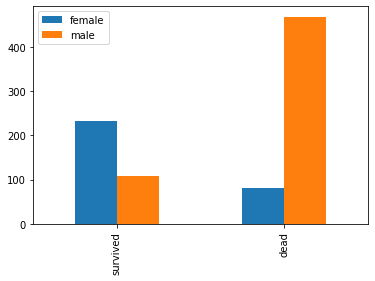

In [86]:
df.plot.bar()

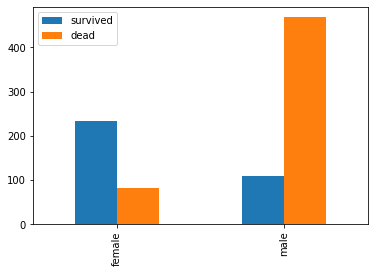

In [87]:
df = df.T
df.plot.bar()

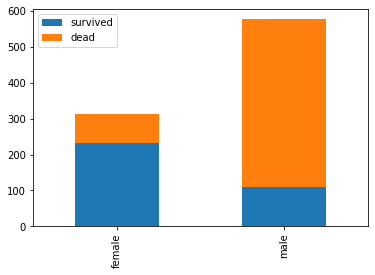

In [88]:
df.plot(kind='bar', stacked = True)

In [89]:
df.sum()

survived    342
dead        549
dtype: int64

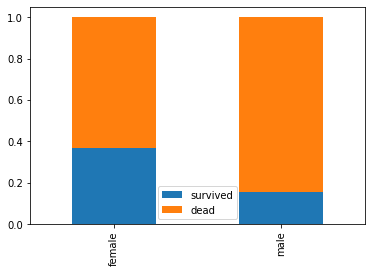

In [96]:
df['survived'] = df.survived / (df.survived + df.dead)
df['dead'] = df.dead / (df.survived + df.dead)
df[['survived','dead']].plot(kind = 'bar', stacked = True)

In [104]:
titanic.Age.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
29.00     20
32.00     18
27.00     18
35.00     18
26.00     18
16.00     17
31.00     17
34.00     15
20.00     15
23.00     15
33.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
47.00      9
        ... 
71.00      2
59.00      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
10.00      2
64.00      2
40.50      2
32.50      2
45.50      2
20.50      1
24.50      1
0.67       1
14.50      1
0.92       1
74.00      1
34.50      1
80.00      1
12.00      1
36.50      1
53.00      1
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [126]:
survived = titanic[titanic.Survived==1].Age
dead = titanic[titanic.Survived==0].Age
df = pd.DataFrame([survived,dead], index = ['survived','dead'])
df = df.T

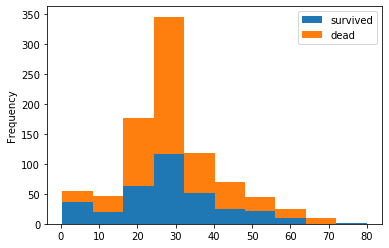

In [127]:

df.plot(kind = 'hist', stacked = True)

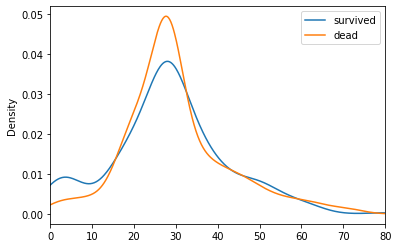

In [132]:
df.plot(kind = 'kde', xlim = (0,80))

In [129]:
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### 读取stata和spss数据

In [9]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pyreadstat

In [179]:
df, meta = pyreadstat.read_sav('C:\\Users\\Evil_Junior\\OneDrive\\University of Sheffield\\Introduction to Quantitative Analysis\\BES2015.sav')

In [180]:
print(meta.column_names_to_labels)

{'ISSUE': 'Most important issue?', 'PTYISSUE': 'Best party for important issue?', 'POLINT': 'Interest in politics?', 'POLCARE': "Politicians don't care what people like me think", 'POLUND': 'Often difficult to understand gov and pol', 'POLCHOI': "Main parties don't offer real choices", 'VOTED': 'Did you vote?', 'VOTE': 'Party vote', 'VTREASON': 'Reasons for party choice?', 'PARTYID': 'Party identification', 'LRORDIN': 'Ordinary working people get fair share', 'LRONELAW': 'One law for rich and one for poor', 'LRYOUNG': "Young people don't have respect for traditional British values", 'LRCENSOR': 'Censorship is necessary to uphold moral values', 'LRTUNION': 'No need for strong trade unions', 'LRPRIVEN': 'Private enterprise best way to solve economic problems', 'LRPUBSER': 'Major public services ought to be in state ownership', 'LRGOVJOB': 'Government responsibility to provide job for everyone', 'LRPROTES': 'People should be allowed to protest', 'LRTOLER': 'People should be more tolerant'

In [181]:
type(df)

pandas.core.frame.DataFrame

In [182]:
df.head()

,ISSUE,PTYISSUE,POLINT,POLCARE,POLUND,POLCHOI,VOTED,VOTE,VTREASON,PARTYID,...,RELIGATT,ETHNIC,EDUCQUAL,NUMBER,SEAT,GOR,finalserialno,AGECAT,VOTEPTY,filter_$
0,1.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,...,NaN,1.0,NaN,19.0,Ashfield,4.0,10102.0,4.0,1.0,1.0
1,NaN,3.0,1.0,2.0,2.0,5.0,1.0,1.0,3.0,3.0,...,NaN,1.0,NaN,19.0,Ashfield,4.0,10104.0,4.0,1.0,1.0
2,4.0,1.0,3.0,4.0,3.0,4.0,2.0,NaN,NaN,10.0,...,6.0,1.0,NaN,19.0,Ashfield,4.0,10107.0,6.0,NaN,1.0
3,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,NaN,1.0,NaN,19.0,Ashfield,4.0,10109.0,3.0,NaN,1.0
4,NaN,1.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,1.0,...,8.0,1.0,NaN,19.0,Ashfield,4.0,10202.0,5.0,3.0,1.0


In [171]:
df.describe()

,ISSUE,PTYISSUE,POLINT,POLCARE,POLUND,POLCHOI,VOTED,VOTE,VTREASON,PARTYID,...,RELIGION,RELIGATT,ETHNIC,EDUCQUAL,NUMBER,GOR,finalserialno,AGECAT,VOTEPTY,filter__
count,2132.000000,2345.000000,2979.000000,2957.000000,2960.000000,2933.000000,2977.000000,2097.000000,2197.000000,2788.000000,...,2987.000000,1714.000000,2987.000000,2199.000000,2987.000000,2987.000000,2987.000000,2955.000000,2097.000000,2987.000000
mean,5.424484,3.084009,2.423296,3.367602,3.369932,3.443914,1.262009,2.595613,1.929904,3.068867,...,3.309006,5.039090,2.201540,7.176899,325.575829,6.028122,40860.042183,4.084264,2.158798,0.857047
std,5.231158,2.231910,0.919753,1.125335,1.158877,1.092581,0.439801,1.976373,1.387756,2.069546,...,3.690640,2.609469,3.408191,4.806075,186.914784,3.008341,17182.071061,1.620370,1.089094,0.350083
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,10102.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,3.000000,1.000000,2.000000,157.000000,3.000000,26703.000000,3.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,3.000000,...,2.000000,5.000000,1.000000,7.000000,325.000000,6.000000,40801.000000,4.000000,2.000000,1.000000
75%,7.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,...,4.000000,8.000000,1.000000,10.000000,492.000000,8.000000,55904.500000,6.000000,3.000000,1.000000
max,33.000000,10.000000,4.000000,5.000000,5.000000,5.000000,2.000000,9.000000,5.000000,10.000000,...,18.000000,8.000000,18.000000,18.000000,649.000000,11.000000,70010.000000,6.000000,4.000000,1.000000


In [56]:
df.isnull().sum()

ISSUE             855
PTYISSUE          642
POLINT              8
POLCARE            30
POLUND             27
POLCHOI            54
VOTED              10
VOTE              890
VTREASON          790
PARTYID           199
LRORDIN            93
LRONELAW           52
LRYOUNG            79
LRCENSOR          111
LRTUNION          125
LRPRIVEN          306
LRPUBSER          239
LRGOVJOB           63
LRPROTES           55
LRTOLER           132
LRSCALE            31
TXSPSELF            0
TXSPCON             0
TXSPLAB             0
TXSPLIB             0
TXSPUKIP            0
TXSPGREE            0
ENVECON             0
LEADEM              0
LEADDC              0
                 ... 
MORENOW          2835
CLASSSUB            0
BUSINPOW            0
WELFBEN             0
WELFHELP            0
WELFSSEC            0
WELFUNEM            0
POLQUIZ1            0
POLQUIZ2            0
POLQUIZ3            0
POLQUIZ4            0
POLQUIZ5            0
POLQUIZ6            0
Age                 0
GENDER    

In [128]:
df.VOTED.value_counts()

1.0    2197
2.0     780
Name: VOTED, dtype: int64

In [80]:
df.VOTED.describe()

count    2977.000000
mean        1.262009
std         0.439801
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: VOTED, dtype: float64

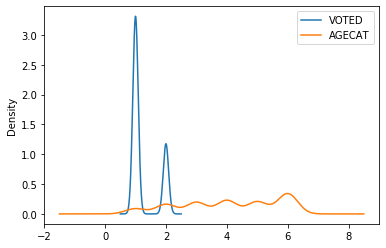

In [96]:
df[['VOTED','AGECAT']].plot(kind='kde')

In [184]:
pyreadstat.write_sav(df, "destination.sav", file_label="test")